## Using the ATM-diag class for nextGEMS cycle 3 data

In [1]:
from aqua import Reader, catalogue, inspect_catalogue
import os
import sys
%env PATH={os.environ["PATH"]}:{sys.exec_prefix}/bin/
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_directory)

from atm_global_mean import AGM_diag

FDB5 binary library not present on system, disabling FDB support.
env: PATH=/sw/spack-levante/texlive-live2021-l5o6sw/bin/x86_64-linux:/sw/spack-levante/texlive-live2021-l5o6sw/bin:/sw/spack-levante/git-lfs-2.11.0-oihcwo/bin:/sw/spack-levante/git-2.31.1-25ve7r/bin:/sw/spack-levante/jupyterhub/jupyterhub/bin:/sw/spack-workplace/spack/bin:/usr/share/Modules/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/home/b/b382257/.conda/envs/aqua/bin/


In [2]:
cat = catalogue()
inspect_catalogue(cat)

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- lra-r100-monthly	LRA data monthly at r100
IFS	test-tco2559	4km experiment, coupled with FESOM
	- ICMGG_atm2d	2d output
	- ICMU_atm3d	3d output
IFS	test-tco79	TCO79 test data
	- short	original 2d output
	- long	coarse IFS data 1y
IFS	tco25

['IFS',
 'FESOM',
 'ICON',
 'MSWEP',
 'ERA5',
 'CERES',
 'AVISO',
 'PHC3',
 'WOA18',
 'OSI-SAF']

In [3]:
plotdir = './plots/AtmGlobalBiases/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)

In [4]:
reader_era5 = Reader(model="ERA5", exp="era5", source="monthly")
data_era5 = reader_era5.retrieve(fix=True)

reader_tco2559 = Reader(model = 'IFS', exp = 'tco2559-ng5-cycle3', source = 'lra-r100-monthly')
data_tco2559 = reader_tco2559.retrieve(fix = False)

reader_tco1279 = Reader(model="IFS", exp="tco1279-orca025-cycle3",source = 'lra-r100-monthly')
data_tco1279 = reader_tco1279.retrieve()

2023-06-29 17:01:46 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco2559-ng5-cycle3, source lra-r100-monthly
2023-06-29 17:01:49 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco1279-orca025-cycle3, source lra-r100-monthly


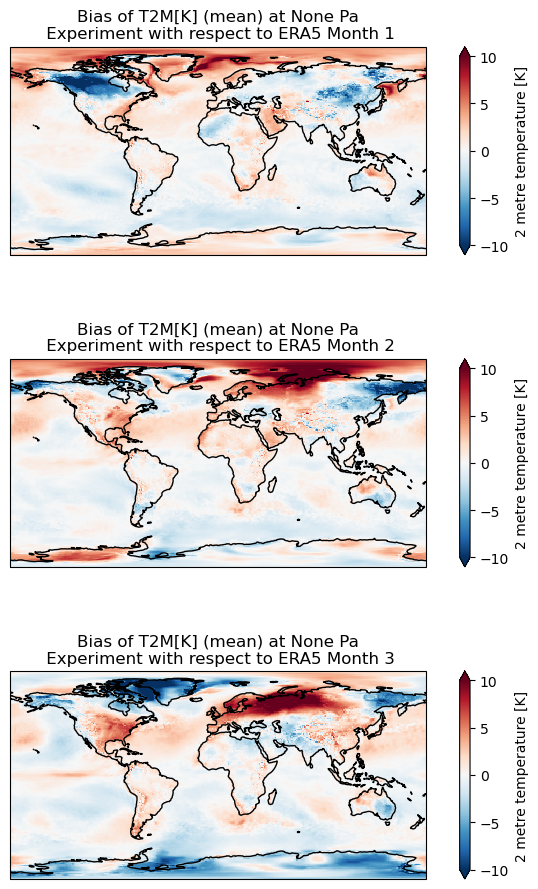

In [5]:
# Call function for Temperature Biases
result, bias_map =  AGM_diag.compare_datasets(data_tco2559, data_era5, '2t', 'T2M', slice('2020-01-01', '2020-04-01'), plev = None, statistic = 'mean')

We can also plot biases between model A and model B. Here is an example for the visualizing the difference between the IFS 4.4 km and the 9 km experiment:

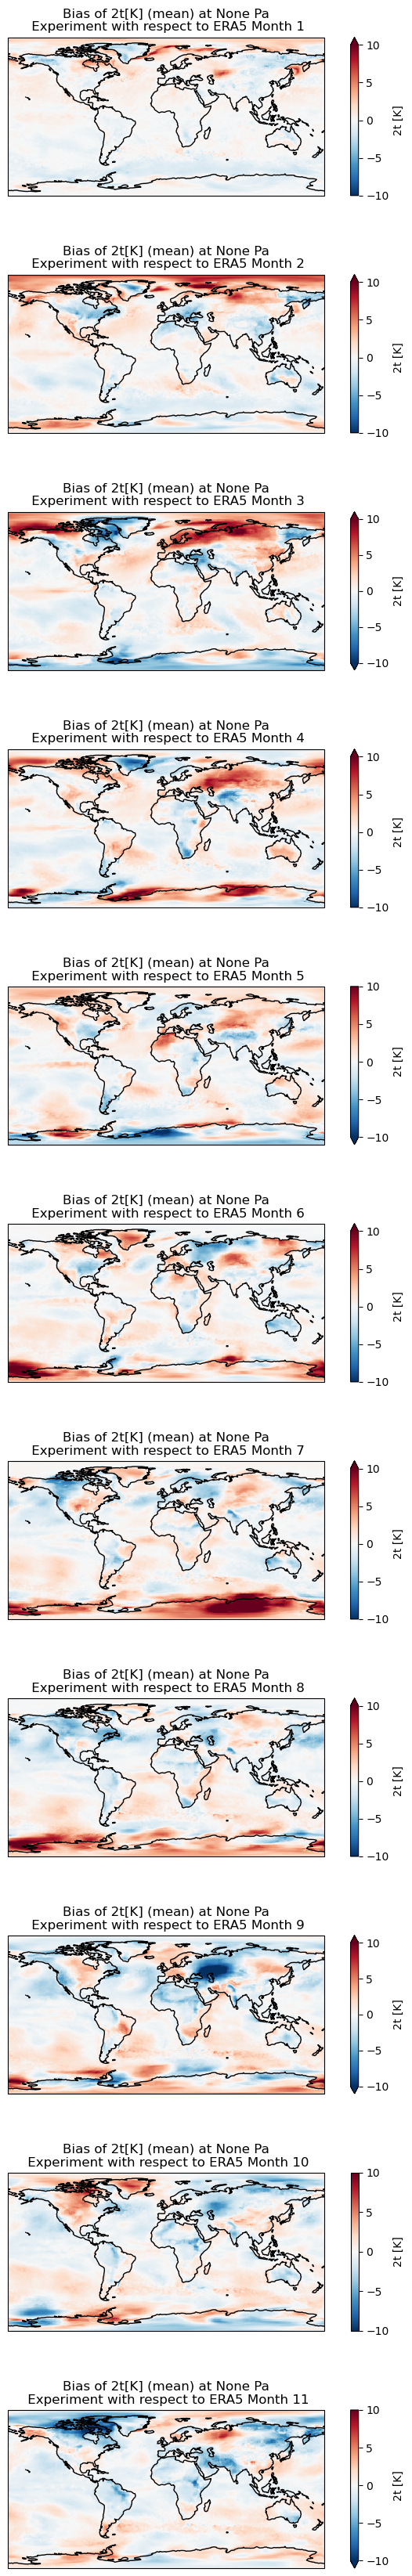

In [7]:
result, bias_map =  AGM_diag.compare_datasets(data_tco2559, data_tco1279, '2t', '2t', slice('2020-01-01', '2020-12-01'), plev = None, statistic = 'mean')

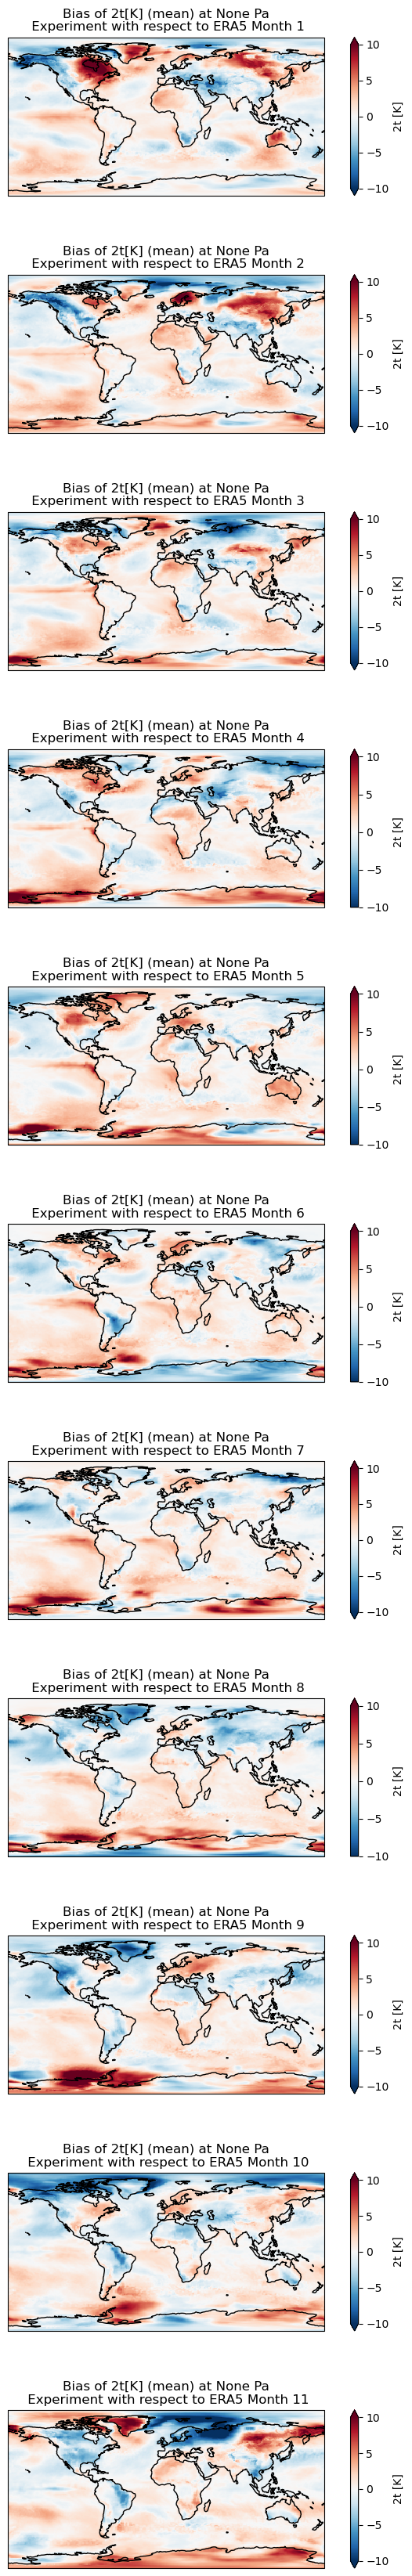

In [9]:
result, bias_map =  AGM_diag.compare_datasets(data_tco2559, data_tco1279, '2t', '2t', slice('2023-01-01', '2023-12-01'), plev = None, statistic = 'mean')